# <center>Dispersive Flies Optimization</center>

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [131]:
data = pd.read_csv('data/Swarm_Behaviour.csv')

In [132]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


## Data Processing

#### Label Encoding

In [133]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

In [134]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,10795,9519,240,735,100,98,372,351,253,245,...,83,100,100,356,332,212,226,28,0,0
1,8651,9096,1432,899,100,98,372,351,253,245,...,855,100,100,356,332,212,226,4,0,0
2,8774,6531,1596,558,100,98,372,351,271,219,...,346,100,100,356,332,201,196,15,1,0
3,9514,698,1286,2016,83,196,372,351,253,245,...,2108,74,194,356,332,212,226,16,0,0
4,15926,16031,1000,1922,0,193,372,351,253,245,...,2286,1,100,588,648,212,226,12,0,0


#### Feature Scaling

In [135]:
from sklearn import preprocessing
X = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(data_scaled)

In [136]:
df.columns = data.columns

In [137]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0.634664,0.567249,0.105125,0.299389,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.034411,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.205882,0.000000,0.0
1,0.508613,0.542042,0.627245,0.366191,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.354478,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.029412,0.000000,0.0
2,0.515845,0.389190,0.699080,0.227291,0.546448,0.497462,0.529915,0.500713,0.549696,0.442424,...,0.143449,0.515464,0.507614,0.509299,0.501511,0.443709,0.412632,0.110294,0.015625,0.0
3,0.559351,0.041595,0.563294,0.821181,0.453552,0.994924,0.529915,0.500713,0.513185,0.494949,...,0.873964,0.381443,0.984772,0.509299,0.501511,0.467991,0.475789,0.117647,0.000000,0.0
4,0.936328,0.955307,0.438020,0.782892,0.000000,0.979695,0.529915,0.500713,0.513185,0.494949,...,0.947761,0.005155,0.507614,0.841202,0.978852,0.467991,0.475789,0.088235,0.000000,0.0


#### Define Target and Feature Variables

In [138]:
#feature variables
X = df.drop(['Swarm_Behaviour'], axis=1).values

#target variable
y = df['Swarm_Behaviour'].values

#### Train-Test Split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

## Data Analysis

In [140]:
df.shape

(23309, 2401)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2401)
memory usage: 427.0 MB


In [142]:
df["Swarm_Behaviour"].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

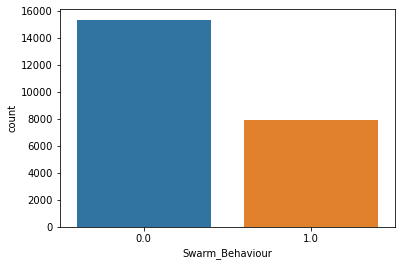

In [144]:
sns.countplot(df['Swarm_Behaviour'])

## Classification

### In this work, at first classification models has been applied without optimization
#### Classifier Used-
- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forrest
- Neural Networks

In [145]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models['Neural Networks'] = MLPClassifier()

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy = {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)

In [147]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()

df_model

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.871586
Random Forest,0.869155
K-Nearest Neighbor,0.888460
Neural Networks,0.892607


## Implementation of DFO Algorithm

#### FITNESS FUNCTION (SPHERE FUNCTION)

In [148]:
def f(x): # x IS A VECTOR REPRESENTING ONE FLY
    sum = 0.0
    for i in range(len(x)):
        sum = sum + np.power(x[i],2)
    return sum

#### Set population size N, dimensionality D, disturbance threshold delta and iterations

In [149]:
X_train.shape[0]

16316

In [150]:
X_train.shape[1]

2400

In [185]:
N = 4000 # POPULATION SIZE
D = X_train.shape[1] # DIMENSIONALITY 
delta = 0.005 # DISTURBANCE THRESHOLD 
maxIterations = 50 # ITERATIONS ALLOWED

#### PHASE INITIALIZATION

In [186]:
A = X_train # FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

#### MAIN DFO LOOP

In [187]:
for itr in range (maxIterations):
    for i in range(N): # EVALUATION
        fitness[i] = f(A[i,])
    s = np.argmin(fitness) # FIND BEST FLY

    if (itr%1 == 0): # PRINT BEST FOR EACH ITERATIONS
        print ("Iteration:", itr, "\tBest fly index:", s, 
               "\tFitness value:", fitness[s])

    # TAKE EACH FLY INDIVIDUALLY 
    for i in range(N): 
        if i == s: continue # ELITIST STRATEGY

        # FIND BEST NEIGHBOUR
        left = (i-1)%N
        right = (i+1)%N
        bNeighbour = right if fitness[right]<fitness[left] else left

        for d in range(D): # UPDATE EACH DIMENSION SEPARATELY 
            if (np.random.rand() < delta):
                A[i,d] = X_train[i,d]
                continue;

            u = np.random.rand()
            A[i,d] = A[bNeighbour,d] + u*(A[s,d] - A[i,d])

for i in range(N): fitness[i] = f(A[i,]) # EVALUATION
s = np.argmin(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  A[s,])

Iteration: 0 	Best fly index: 1621 	Fitness value: 211.90588078136042
Iteration: 1 	Best fly index: 759 	Fitness value: 194.16737131550414
Iteration: 2 	Best fly index: 596 	Fitness value: 188.84031570765944
Iteration: 3 	Best fly index: 596 	Fitness value: 188.84031570765944
Iteration: 4 	Best fly index: 595 	Fitness value: 186.20356473438602
Iteration: 5 	Best fly index: 1771 	Fitness value: 182.2275727305514
Iteration: 6 	Best fly index: 2446 	Fitness value: 180.55154616091
Iteration: 7 	Best fly index: 2152 	Fitness value: 178.80782519401717
Iteration: 8 	Best fly index: 1239 	Fitness value: 178.04047571146995
Iteration: 9 	Best fly index: 1403 	Fitness value: 176.63887550526653
Iteration: 10 	Best fly index: 1239 	Fitness value: 176.19729041674114
Iteration: 11 	Best fly index: 3093 	Fitness value: 174.7477320309822
Iteration: 12 	Best fly index: 2405 	Fitness value: 173.5474852562518
Iteration: 13 	Best fly index: 1024 	Fitness value: 172.56110446047646
Iteration: 14 	Best fly in

#### CONVERT FITNESS VALUES INTO ARRAYS

In [188]:
new_arr = []
for i in range(len(fitness)):
    new_arr.append([fitness[i]])

z_fitness = np.array(new_arr)
z_fitness

array([[148.83155938],
       [148.68251028],
       [148.70973429],
       ...,
       [149.79058108],
       [149.42944983],
       [148.6087563 ]])

## Feature Selection

#### DEFINE BINARY CONVERSION FUNCTION

In [189]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

#### FEATURE SELECTION USING FITNESS

In [190]:
# Best feature subset
dim = X_train.shape[1]
thres = 0.019
Gbin       = binary_conversion(A, thres, 1, dim) 
Gbin       = Gbin.reshape(dim)
pos        = np.asarray(range(0, dim))    
sel_index  = pos[Gbin == 1]
num_feat   = len(sel_index)
# Create dictionary
opt_data = {'sf': sel_index, 'nf': num_feat}

In [191]:
print(Gbin)
print(sel_index)
print(num_feat)

[1 1 1 ... 1 0 1]
[   0    1    2 ... 1524 1525 1527]
1142


In [192]:
opt_data['sf']

array([   0,    1,    2, ..., 1524, 1525, 1527])

In [193]:
new_data = df.iloc[:,opt_data['sf']]

In [194]:
new_data

,x1,y1,xVel1,yVel1,yA1,xS1,yS1,xC1,yC1,x2,...,xVel127,yVel127,xA127,xS127,xC127,nAC127,nS127,x128,y128,yVel128
0,0.634664,0.567249,0.105125,0.299389,0.497462,0.529915,0.500713,0.513185,0.494949,0.375462,...,0.641319,0.164822,0.505102,0.501493,0.510776,0.321678,0.015625,0.761090,0.739294,0.177100
1,0.508613,0.542042,0.627245,0.366191,0.497462,0.529915,0.500713,0.513185,0.494949,0.452232,...,0.659780,0.495695,0.505102,0.501493,0.510776,0.433566,0.000000,0.611138,0.426708,0.298188
2,0.515845,0.389190,0.699080,0.227291,0.497462,0.529915,0.500713,0.549696,0.442424,0.066272,...,0.204396,0.578106,0.505102,0.571642,0.454741,0.041958,0.015625,0.043346,0.027280,0.819193
3,0.559351,0.041595,0.563294,0.821181,0.994924,0.529915,0.500713,0.513185,0.494949,0.459562,...,0.388132,0.907749,0.413265,0.501493,0.510776,0.041958,0.000000,0.671596,0.641789,0.890445
4,0.936328,0.955307,0.438020,0.782892,0.979695,0.529915,0.500713,0.513185,0.494949,0.224034,...,0.020659,0.478065,0.005102,0.501493,0.510776,0.125874,0.000000,0.946578,0.447495,0.423806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,0.380740,0.620464,0.961016,0.181670,0.497462,0.529915,0.500713,0.513185,0.494949,0.010146,...,0.069890,0.542435,0.005102,0.501493,0.510776,0.111888,0.000000,0.897865,0.954018,0.257825
23305,0.016815,0.446755,0.488830,0.297760,0.218274,0.529915,0.500713,0.569980,0.498990,0.644009,...,0.304176,0.371054,0.464286,0.501493,0.502155,0.783217,0.000000,0.838600,0.070403,0.274712
23306,0.014228,0.101663,0.399912,0.426477,0.497462,0.529915,0.500713,0.513185,0.494949,0.363615,...,0.757802,0.014350,0.505102,0.501493,0.510776,0.237762,0.015625,0.980682,0.794449,0.093081
23307,0.792345,0.832132,0.295226,0.356008,0.000000,0.529915,0.500713,0.513185,0.494949,0.037359,...,0.862857,0.071751,1.000000,0.501493,0.510776,0.062937,0.000000,0.312008,0.750313,0.878089


## Classification after Optimization

In [195]:
#feature variables
X = new_data.values

#target variable
y = df['Swarm_Behaviour'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

Shape of X_train: (23309, 1142)
Shape of y_train: (23309,)


In [196]:
models1 = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models1['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models1['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models1['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models1['Random Forest'] = RandomForestClassifier()


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models1['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models1['Neural Networks'] = MLPClassifier()


In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy1 = {}

for key in models1.keys():
    
    # Fit the classifier
    models1[key].fit(X_train, y_train)

    #     # Make predictions
    predictions1 = models1[key].predict(X_test)

    #     # Calculate metrics
    accuracy1[key] = accuracy_score(predictions1, y_test)

In [198]:
df_model1 = pd.DataFrame(index=models1.keys(), columns=['Accuracy'])
df_model1['Accuracy'] = accuracy1.values()

df_model1

,Accuracy
Logistic Regression,0.888889
Support Vector Machines,0.886458
Decision Trees,0.873016
Random Forest,0.869155
K-Nearest Neighbor,0.886887
Neural Networks,0.895038


In [199]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


In [201]:
display_side_by_side(df_model,df_model1, titles=['Classification without DFO','Classification with DFO'])

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.871586
Random Forest,0.869155
K-Nearest Neighbor,0.888460
Neural Networks,0.892607
,Accuracy
Logistic Regression,0.888889
Support Vector Machines,0.886458
Decision Trees,0.873016
